In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# import roi
filename = 'img1.png'
roi = cv2.imread('roi_' + filename)
plt.imshow(roi)

In [3]:
# Convert to grayscale and preprocess
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


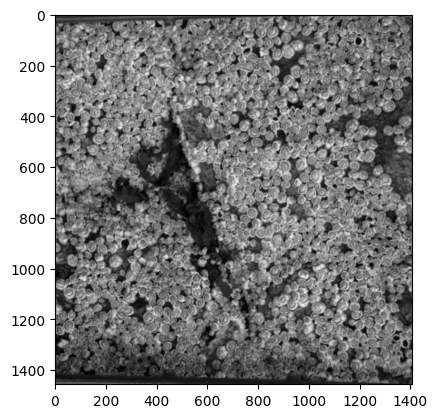

In [57]:
# gaussian blurring
blurred = cv2.GaussianBlur(gray, (9, 9), 0)
plt.imshow(blurred, cmap='gray')

In [58]:
# simple hough circle detection
circles = cv2.HoughCircles(blurred,
                           cv2.HOUGH_GRADIENT,
                           dp = 1,
                           minDist = 10,
                           param1=100,
                           param2=30,
                           minRadius=10,
                           maxRadius=40)

# copy the roi
roi_circles = roi.copy()

# Draw circles and display count
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # draw the outer circle
        cv2.circle(roi_circles, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # draw the center of the circle
        cv2.circle(roi_circles, (i[0], i[1]), 2, (0, 0, 255), 3)

    print('Number of circles detected:', circles.shape[1])

Number of circles detected: 603


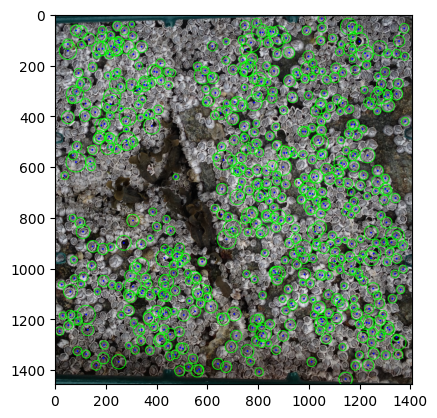

In [59]:
# Display the image with detected circles
plt.imshow(roi_circles)